[ 2.27241541e-17 -2.70815923e-17  1.00000000e+00]
[ 0.         -0.31622777  0.9486833 ]
diff=0.32036448601393447
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.83022222e-01
   3.21393805e-01  8.66025404e-01]
 [ 3.83022222e-01  3.21393805e-01  8.66025404e-01  1.00000000e+00
  -1.19175359e+00 -1.92296269e-16]
 [ 1.38302222e+00 -8.70359788e-01  8.66025404e-01  1.00000000e+00
  -1.19175359e+00  4.40060385e+16]]


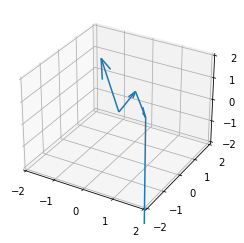

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

a = np.radians(40)
b = np.radians(60)
c = np.radians(90)
d = np.radians(0)

optimal_v = [0,0,0,0,-1,3]
v1 = [0, 0, 0, np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b)]
v2 = [np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b), 1,np.tan(a-c),- (np.cos(a)+np.sin(a)*np.tan(a-c))/np.tan(b)]
v3 = [np.cos(b)*np.cos(a)+ 1, np.cos(b)*np.sin(a) + np.tan(a-c), np.sin(b) - (np.cos(a)+np.sin(a)*np.tan(a-c))/np.tan(b), 1, np.tan(a-c-d), np.tan(b)*np.cos(a-c)*(np.tan(a-c)*np.tan(a-c-d)+1)/np.cos(c)]
soa = np.array([optimal_v,v1,v2,v3])


v3_2 = v3[3:]/np.linalg.norm(np.array(v3[3:]))
optimal_v_2 = optimal_v[3:]/np.linalg.norm(np.array(optimal_v[3:]))
print(v3_2)
print(optimal_v_2)
print("diff="+str(np.linalg.norm(v3_2-optimal_v_2)))

print(soa)
X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
plt.show()

88 87
diff=0.42789721415831283
[[ 0.          0.          0.          0.         -0.54463904  0.83867057]
 [ 0.          0.          0.         -0.35355339  0.35355339  0.8660254 ]
 [-0.35355339  0.35355339  0.8660254   0.68185996  0.73120529 -0.02014514]
 [ 0.32830657  1.08475868  0.84588026  0.27523214 -0.23094719  0.93322595]]


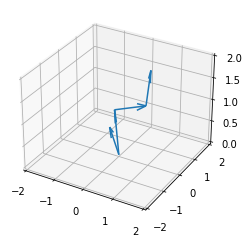

In [14]:
# 東から反時計回り1                                                                                                                                                                                                                                                                                         
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

min_diff = 10**6
min_c = 0
min_d = 0
a = np.radians(135)
b = np.radians(60)

for c_change in range(1,89):
    for d_change in range(1,89):

        c = np.radians(c_change)
        d = np.radians(d_change)


        optimal_v = [0,0,0,0,-np.sin(np.radians(33)),np.cos(np.radians(33))]
        v1 = [0, 0, 0, np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b)]
        v2 = [np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b), 1,np.tan(a-c),- (np.cos(a)+np.sin(a)*np.tan(a-c))/np.tan(b)]
        v2 = [np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b), 1/np.linalg.norm(np.array(v2[3:])),np.tan(a-c)/np.linalg.norm(np.array(v2[3:])),- (np.cos(a)+np.sin(a)*np.tan(a-c))/(np.tan(b)*np.linalg.norm(np.array(v2[3:])))]
        v3 = [v2[0]+v2[3], v2[1]+v2[4], v2[2]+v2[5], 1, np.tan(a-c-d), np.tan(b)*np.cos(a-c)*(np.tan(a-c)*np.tan(a-c-d)+1)/np.cos(c)]
        v3 = [v2[0]+v2[3], v2[1]+v2[4], v2[2]+v2[5], 1/np.linalg.norm(np.array(v3[3:])), np.tan(a-c-d)/np.linalg.norm(np.array(v3[3:])), np.tan(b)*np.cos(a-c)*(np.tan(a-c)*np.tan(a-c-d)+1)/(np.cos(c)*np.linalg.norm(np.array(v3[3:])))]
        soa = np.array([optimal_v,v1,v2,v3])


        v3_2 = v3[3:]/np.linalg.norm(np.array(v3[3:]))
        optimal_v_2 = optimal_v[3:]/np.linalg.norm(np.array(optimal_v[3:]))
        # print(v3_2)
        # print(optimal_v_2)
        # print("diff="+str(np.linalg.norm(v3_2-optimal_v_2)))
        if np.linalg.norm(v3_2-optimal_v_2) < min_diff:
            min_diff = np.linalg.norm(v3_2-optimal_v_2)
            min_c = c_change
            min_d = d_change

c = np.radians(min_c)
d = np.radians(min_d)

optimal_v = [0,0,0,0,-np.sin(np.radians(33)),np.cos(np.radians(33))]
optimal_v = [0,0,0,0,-np.sin(np.radians(33))/np.linalg.norm(np.array(optimal_v[3:])),np.cos(np.radians(33))/np.linalg.norm(np.array(optimal_v[3:]))]
v1 = [0, 0, 0, np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b)]
v2 = [np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b), 1,np.tan(a-c),- (np.cos(a)+np.sin(a)*np.tan(a-c))/np.tan(b)]
v2 = [np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b), 1/np.linalg.norm(np.array(v2[3:])),np.tan(a-c)/np.linalg.norm(np.array(v2[3:])),- (np.cos(a)+np.sin(a)*np.tan(a-c))/(np.tan(b)*np.linalg.norm(np.array(v2[3:])))]
v3 = [v2[0]+v2[3], v2[1]+v2[4], v2[2]+v2[5], 1, np.tan(a-c-d), np.tan(b)*np.cos(a-c)*(np.tan(a-c)*np.tan(a-c-d)+1)/np.cos(c)]
v3 = [v2[0]+v2[3], v2[1]+v2[4], v2[2]+v2[5], 1/np.linalg.norm(np.array(v3[3:])), np.tan(a-c-d)/np.linalg.norm(np.array(v3[3:])), np.tan(b)*np.cos(a-c)*(np.tan(a-c)*np.tan(a-c-d)+1)/(np.cos(c)*np.linalg.norm(np.array(v3[3:])))]
soa = np.array([optimal_v,v1,v2,v3])

v3_2 = v3[3:]/np.linalg.norm(np.array(v3[3:]))
optimal_v_2 = optimal_v[3:]/np.linalg.norm(np.array(optimal_v[3:]))

print(min_c, min_d)
print("diff="+str(np.linalg.norm(v3_2-optimal_v_2)))

print(soa)
X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([0, 2])
plt.show()